In [6]:
import pandas as pd
import numpy as np
#from pprint import pprint
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("once")


https://alpha-vantage.readthedocs.io/en/latest/

free api key: https://www.alphavantage.co/support/#api-key


In [1]:
#!conda install -n jupyter -c ranaroussi yfinance
!pip install alpha-vantage

!pip install python-dotenv # for safe passing of sensitive info like password, api key etc
# see how to pass in secret data via env variables: https://medium.com/@yuthakarn/how-to-not-show-credential-in-jupyter-notebook-c349f9278466

from alpha_vantage.timeseries import TimeSeries
from alpha_vantage.techindicators import TechIndicators
from alpha_vantage.sectorperformance import SectorPerformances
from alpha_vantage.cryptocurrencies import CryptoCurrencies
from alpha_vantage.foreignexchange import ForeignExchange

In [2]:
# setup your os env variables
# it is expected alpha_vantage_API_KEY env variable with alpha vantage api key
# you can implement this by using .env file and python-dotenv python package

ts = TimeSeries(key=alpha_vantage_API_KEY, output_format='pandas', indexing_type='date') 
# results as json dictionaries (default), pandas dataframe (if installed) or csv, simply pass the parameter output_format='pandas'
data, meta_data = ts.get_intraday('AAPL',interval='1min', outputsize='full')
data.head(3)

,1. open,2. high,3. low,4. close,5. volume
date,,,,,
2020-07-31 20:00:00,427.44,427.60,427.44,427.44,6166.0
2020-07-31 19:59:00,427.51,427.60,427.50,427.51,7784.0
2020-07-31 19:58:00,427.68,427.68,427.51,427.51,4337.0


In [4]:
meta_data

{'1. Information': 'Intraday (1min) open, high, low, close prices and volume',
 '2. Symbol': 'AAPL',
 '3. Last Refreshed': '2020-07-31 20:00:00',
 '4. Interval': '1min',
 '5. Output Size': 'Full size',
 '6. Time Zone': 'US/Eastern'}

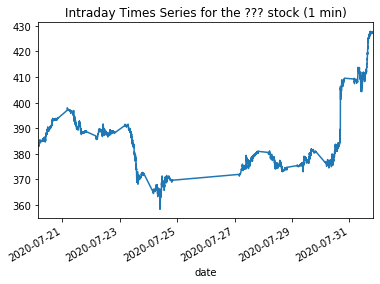

In [7]:
data['4. close'].plot()
plt.title('Intraday Times Series for the AAPL stock (1 min)')
plt.show()

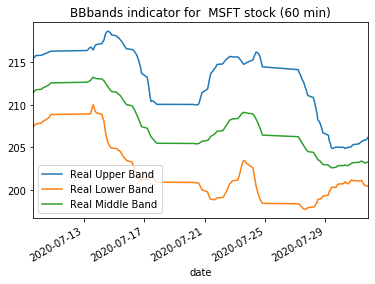

In [8]:
ti = TechIndicators(key=alpha_vantage_API_KEY, output_format='pandas')
data, meta_data = ti.get_bbands(symbol='MSFT', interval='60min', time_period=60)
data.plot()
plt.title('BBbands indicator for  MSFT stock (60 min)')
plt.show()